# Amazon Books Dataset
I used this dataset to practice cleaning data and then some simple visualisations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
books = pd.read_csv('Bookamazon_demo.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,15.0,2018.0,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424.0,6.0,2017.0,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665.0,12.0,2019.0,Non Fiction


In [5]:
# Converting the Year-column to datetime format
books['Year'] = books['Year'] + 0.01
books['Year'].round(decimals=2)
books['Year'] = pd.to_datetime(books['Year'].map('{:.2f}'.format), format='%Y.%m', errors='coerce')

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  434 non-null    float64       
 3   Reviews      475 non-null    float64       
 4   Price        497 non-null    float64       
 5   Year         548 non-null    datetime64[ns]
 6   Genre        550 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 30.2+ KB


In [7]:
# Look for complete duplicates
books_duplicates = books.duplicated()
books[books_duplicates].sum()

Name           0.0
Author         0.0
User Rating    0.0
Reviews        0.0
Price          0.0
Year           0.0
Genre          0.0
dtype: float64

In [9]:
# Look for duplicates based on Name, Author & Genre
column_names = ['Name', 'Author', 'Genre']
duplicates = books.duplicated(subset = column_names, keep=False)
dups = books[duplicates].shape[0]
print('There are ' + str(dups) + ' duplicated rows with the same Name, Author & Genre')

There are 295 duplicated rows with the same Name, Author & Genre


In [10]:
# Sort by Author, User Rating and Year. This to keep the row with 
# highest possible Rating and earliest publishing date
sorted_by = ['Author', 'User Rating', 'Year']

books.sort_values(by=sorted_by, inplace=True)
books.drop_duplicates(subset=column_names, keep='first', inplace=True)

In [11]:
# Making sure no duplicates left based on Name, Author & Genre
duplicates = books.duplicated(subset = column_names, keep=False)
assert (sum(duplicates) == 0)

In [12]:
# Creating rating categories based on user rating 
# ranges = [0, 0.4, 1.4, 2.4, 3.4, 4.4, 5]
# group_names = ['0','1', '2', '3', '4', '5']
# books['Rating Group'] = pd.cut(books['User Rating'], bins=ranges, labels=group_names)

In [46]:
# I will use the mean price for books that have a missing price value.
mean_price = books['Price'].mean()
mean_price = round(mean_price, 1)

In [47]:
# Fill na's
books = books.fillna({'Price': mean_price})

In [48]:
books.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [49]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
56,Cutting for Stone,Abraham Verghese,4.6,4866.0,11.0,2010-01-01,Fiction
232,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113.0,6.0,2017-01-01,Non Fiction
133,Go the F**k to Sleep,Adam Mansbach,4.8,9568.0,9.0,2011-01-01,Fiction
529,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.6,8170.0,13.0,2019-01-01,Fiction
227,Make Your Bed: Little Things That Can Change Y...,Admiral William H. McRaven,4.7,0.0,11.0,2017-01-01,Non Fiction


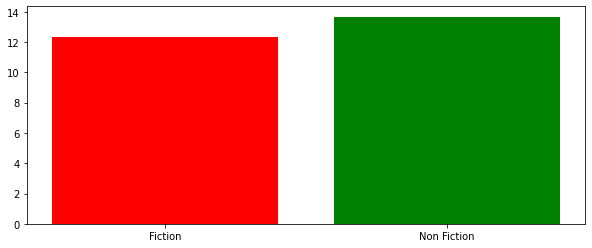

In [50]:
# I'm interested in the mean price of books depending on genre

plt.figure(figsize=(10,4))
ax = plt.subplot()
pricepergenre = books.groupby('Genre')['Price'].mean()
plt.bar(x= books['Genre'].unique(), height=pricepergenre, color=['red', 'green'])
plt.show()

In [51]:
# I'm also interested in the most expensive books for fiction 
fiction = books[books['Genre'] == 'Fiction'].reset_index(drop=True)
fiction_expensive = fiction.sort_values(by='Price', ascending = False).head()

In [52]:
fiction_expensive

,Name,Author,User Rating,Reviews,Price,Year,Genre
142,The Twilight Saga Collection,Stephenie Meyer,4.7,3801.0,82.0,2009-01-01,Fiction
62,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.6,13471.0,52.0,2016-01-01,Fiction
3,Watchmen,Alan Moore,4.8,0.0,42.0,2009-01-01,Fiction
110,The Alchemist,Paulo Coelho,4.6,35799.0,39.0,2014-01-01,Fiction
42,Fifty Shades Trilogy (Fifty Shades of Grey / F...,E L James,4.5,13964.0,32.0,2012-01-01,Fiction


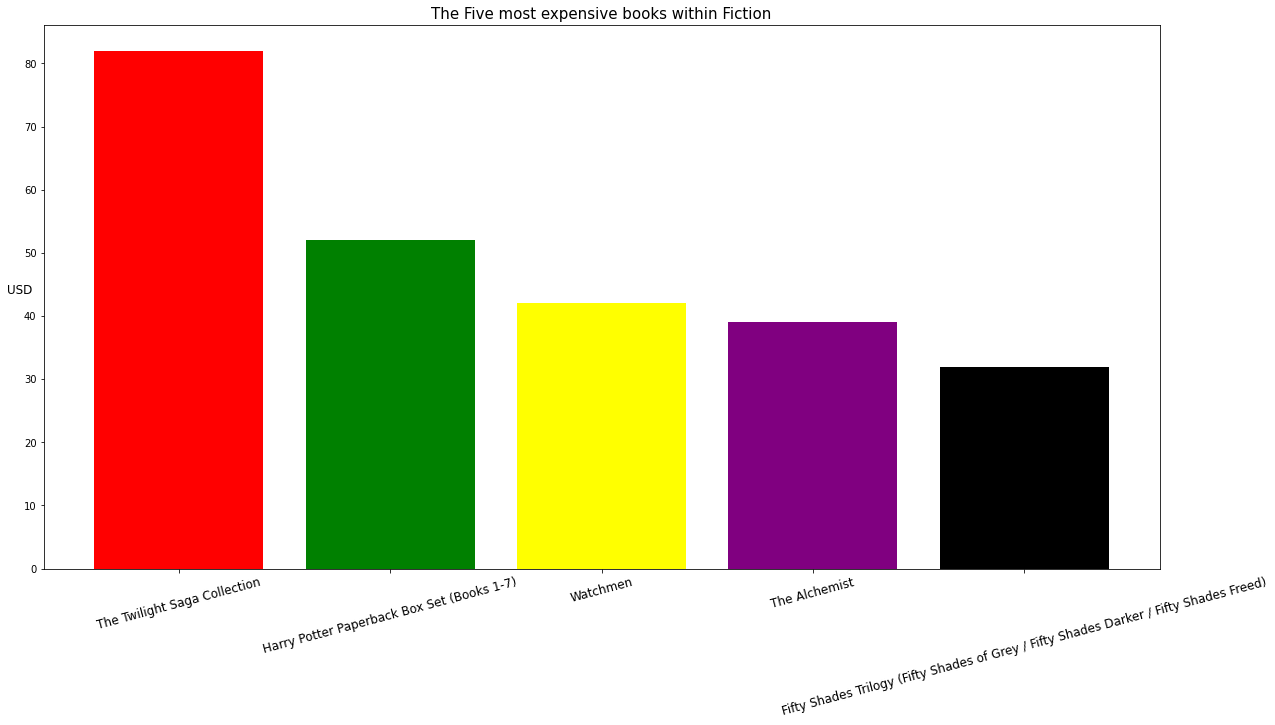

In [63]:
plt.figure(figsize=(20,10))
ax = plt.subplot()
plt.bar(x=fiction_expensive['Name'], height=fiction_expensive['Price'],
        color=['red', 'green', 'yellow', 'purple', 'black'])
plt.xticks(fiction_expensive['Name'], rotation=15, fontsize=12)
plt.ylabel('USD', fontsize=12, rotation='horizontal')
ax.set_title('The Five most expensive books within Fiction', fontsize=15)
plt.show()